# 7. Прочие Графики

### Подключение необходимых библиотек

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
font = {'family': 'serif', 'serif': 'Times New Roman', 'weight': 'normal','size':15}
plt.rc('font',**font)

### График плотности χ2-распределения с разными степенями свободы

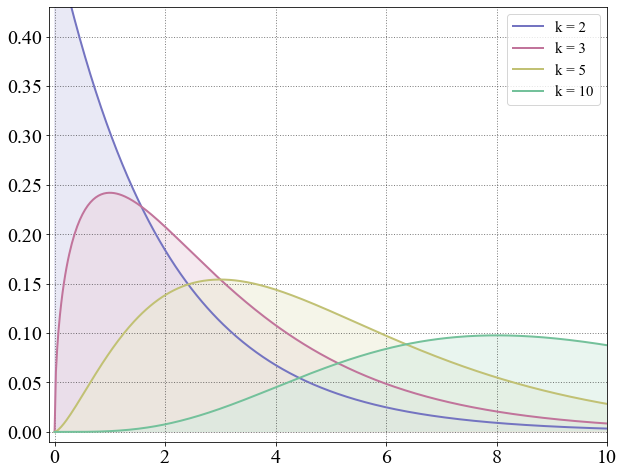

In [4]:
fig,ax =plt.subplots(figsize=(10, 8))
plt.tick_params(labelsize = 20)
plt.tick_params(labelsize = 20)
plt.grid(color='k', alpha=0.5, linestyle=':', linewidth=1)

plt.xlim(-0.1,10)
plt.ylim(-0.01,0.43)

grid = np.linspace(0, 24, 1000)
ax.plot(grid, stats.chi2(df=2).pdf(grid), lw=2, color='#7474c1', label='k = 2')
ax.fill_between(x = grid, y1= stats.chi2(df=2).pdf(grid), y2=0 ,color='#d4d4ec', alpha = 0.5)

ax.plot(grid, stats.chi2(df=3).pdf(grid), lw=2, color='#c1749b', label='k = 3')
ax.fill(grid, stats.chi2(df=3).pdf(grid), color='#ecd4e0', alpha = 0.5)

ax.plot(grid, stats.chi2(df=5).pdf(grid), lw=2, color='#c1c174', label='k = 5')
ax.fill(grid, stats.chi2(df=5).pdf(grid), color='#ececd4', alpha = 0.5)

ax.plot(grid, stats.chi2(df=10).pdf(grid), lw=2, color='#74c19b', label='k = 10')
ax.fill(grid, stats.chi2(df=10).pdf(grid), color='#d4ece0', alpha = 0.5)

plt.legend(["k = 2","k = 3","k = 5","k = 10"],loc = 'upper right')
# plt.show() - Вывод рисунка: Рис. 5. График плотности χ2-распределения с разными степенями свободы

### Значения χ2 для k = 5 и α = 0,1, двусторонняя гипотеза

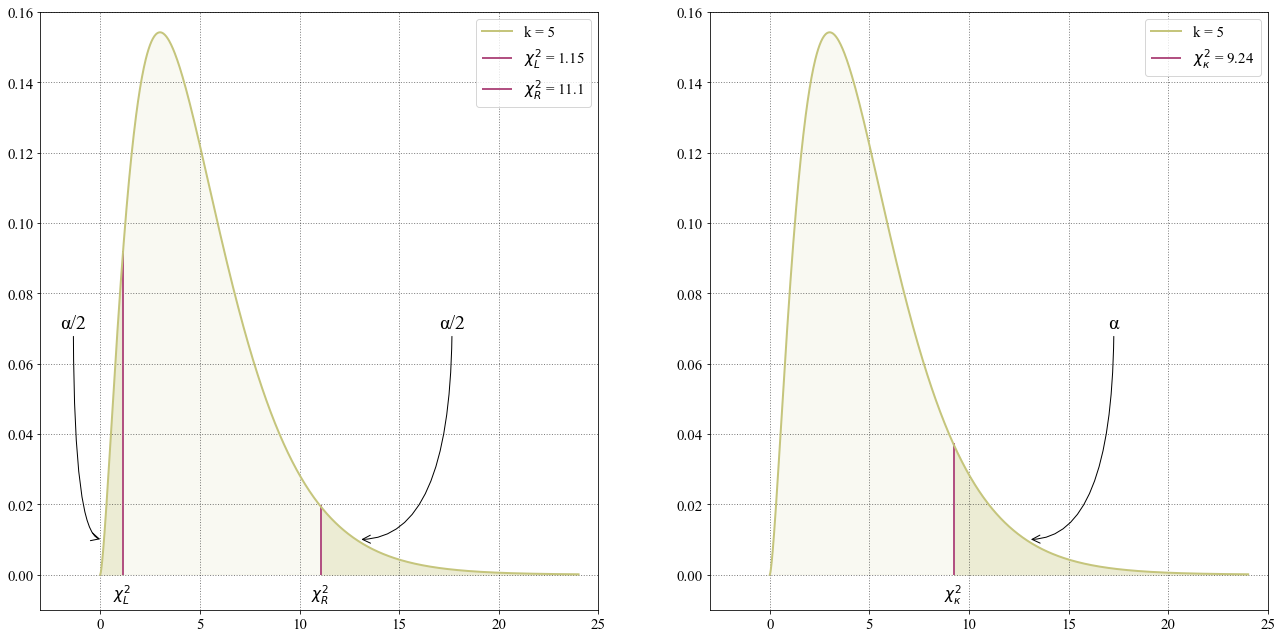

In [5]:
fig, ax = plt.subplots(1,2, figsize=(22, 11))
for i in range(0,2):
    ax[i].grid(color='k', alpha=0.5, linestyle=':', linewidth=1)
    grid = np.linspace(0, 24, 1000)
    ax[i].fill(grid, stats.chi2(df=5).pdf(grid), color='#ececd4', alpha = 0.3)
ax[0].set_xlim([-3,25])
ax[1].set_xlim([-3,25])
ax[0].set_ylim([-0.01,0.160])
ax[1].set_ylim([-0.01,0.160])

chi2_rv1 = stats.chi2(df=5)
line1, = ax[0].plot(grid, stats.chi2(df=5).pdf(grid), lw=2, color='#c5c57c', label='k = 5')

# ЛЕВЫЙ ГРАФИК
# определяем критические значения:
ci_left, ci_right = chi2_rv1.interval(0.9)

x_le_ci_l = grid[grid<ci_left]
x_ge_ci_r = grid[grid>ci_right]

ax[0].fill_between(x_le_ci_l, stats.chi2(df=5).pdf(x_le_ci_l), np.zeros(len(x_le_ci_l)), color='#ececd4', alpha=1)
ax[0].fill_between(x_ge_ci_r, stats.chi2(df=5).pdf(x_ge_ci_r), np.zeros(len(x_ge_ci_r)), color='#ececd4', alpha=1)

line2 = ax[0].vlines(ci_left, 0, 0.092, color='#b25182', lw=2)
line3 = ax[0].vlines(ci_right, 0, 0.0198, color='#b25182', lw=2)

ax[0].annotate('α/2', xy=(13, 0.01),
            xytext=(17, 0.07), fontsize=20, arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=90,angleB=0"))
ax[0].annotate('α/2', xy=(0.1, 0.01),
            xytext=(-2, 0.07), fontsize=20, arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=90,angleB=0"))

ax[0].annotate(f'$χ_L^2$', xy=(ci_left-0.5, -0.007))
ax[0].annotate(f'$χ_R^2$', xy=(ci_right-0.5, -0.007))

ax[0].legend((line1, line2, line3),["k = 5",f'$χ_L^2$ = {ci_left:.3}',f'$χ_R^2$ = {ci_right:.3}'],loc = 'upper right')

# ПРАВЫЙ ГРАФИК
line1, = ax[1].plot(grid, stats.chi2(df=5).pdf(grid), lw=2, color='#c5c57c', label='k = 5')
# Уровень значимости
alpha = 0.1
p = chi2_rv1.isf(alpha)

ax[1].fill_between(grid[grid>p], chi2_rv1.pdf(grid[grid>p]), np.zeros(len(grid[grid>p])), color='#ececd4', alpha=1)

line2 = ax[1].vlines(p, 0, 0.0374, color='#b25182', lw=2)

# Подписи на графике
ax[1].annotate('α', xy = (13, 0.01),
            xytext = (17, 0.07), 
            fontsize = 20, 
            arrowprops = dict(arrowstyle="->", connectionstyle="angle3,angleA=90,angleB=0"))

ax[1].annotate(f'$χ_к^2$', 
            xy = (p-0.5, -0.007))

# Легенда графика
ax[1].legend((line1, line2),["k = 5", f'$χ_к^2$ = {p:.3}'], loc = 'upper right')

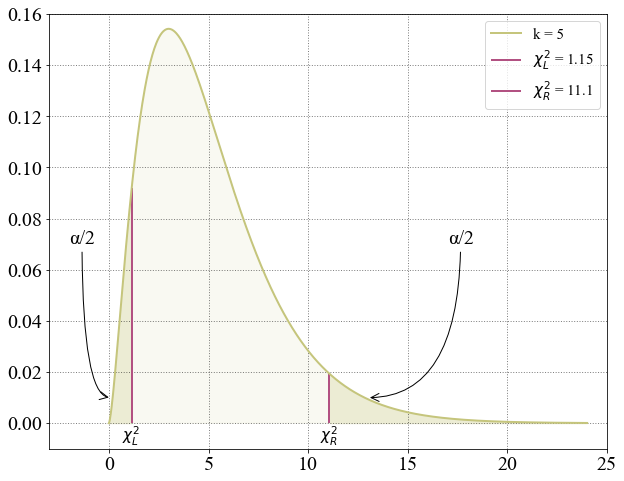

In [6]:
fig,ax =plt.subplots(figsize=(10, 8))
plt.tick_params(labelsize = 20)
plt.tick_params(labelsize = 20)
plt.grid(color='k', alpha=0.5, linestyle=':', linewidth=1)

grid = np.linspace(0, 24, 1000)
line1, = ax.plot(grid, stats.chi2(df=5).pdf(grid), lw=2, color='#c5c57c', label='k = 5')
ax.fill(grid, stats.chi2(df=5).pdf(grid), color='#ececd4', alpha = 0.3)

plt.xlim(-3,25)
plt.ylim(-0.01,0.160)

chi2_rv1 = stats.chi2(df=5)

# определяем критические значения:
ci_left, ci_right = chi2_rv1.interval(0.9)

x_le_ci_l = grid[grid<ci_left]
x_ge_ci_r = grid[grid>ci_right]

ax.fill_between(x_le_ci_l, stats.chi2(df=5).pdf(x_le_ci_l), np.zeros(len(x_le_ci_l)), color='#ececd4', alpha=1)
ax.fill_between(x_ge_ci_r, stats.chi2(df=5).pdf(x_ge_ci_r), np.zeros(len(x_ge_ci_r)), color='#ececd4', alpha=1)

line2 = ax.vlines(ci_left, 0, 0.092, color='#b25182', lw=2)
line3 = ax.vlines(ci_right, 0, 0.0198, color='#b25182', lw=2)

ax.annotate('α/2', xy=(13, 0.01),
            xytext=(17, 0.07), fontsize=20, arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=90,angleB=0"))
ax.annotate('α/2', xy=(0.1, 0.01),
            xytext=(-2, 0.07), fontsize=20, arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=90,angleB=0"))

ax.annotate(f'$χ_L^2$', xy=(ci_left-0.5, -0.007))
ax.annotate(f'$χ_R^2$', xy=(ci_right-0.5, -0.007))

plt.legend((line1, line2, line3),["k = 5",f'$χ_L^2$ = {ci_left:.3}',f'$χ_R^2$ = {ci_right:.3}'],loc = 'upper right')
# plt.show() - Вывод рисунка: Рис. 6. Значения χ2 для k = 5 и α = 0,1, двусторонняя гипотеза

### Значения χ2 для k = 5 и α = 0,1, правосторонняя гипотеза

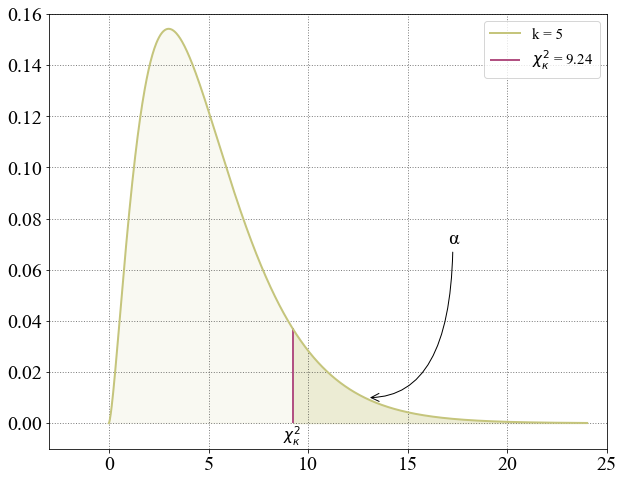

In [7]:
fig,ax =plt.subplots(figsize=(10, 8))
plt.tick_params(labelsize = 20)
plt.tick_params(labelsize = 20)
plt.grid(color='k', alpha=0.5, linestyle=':', linewidth=1)

grid = np.linspace(0, 24, 1000)
line1, = ax.plot(grid, stats.chi2(df=5).pdf(grid), lw=2, color='#c5c57c', label='k = 5')
ax.fill(grid, stats.chi2(df=5).pdf(grid), color='#ececd4', alpha = 0.3)

plt.xlim(-3,25)
plt.ylim(-0.01,0.160)

chi2_rv1 = stats.chi2(df=5)

# Уровень значимости
alpha = 0.1
p = chi2_rv1.isf(alpha)

ax.fill_between(grid[grid>p], chi2_rv1.pdf(grid[grid>p]), np.zeros(len(grid[grid>p])), color='#ececd4', alpha=1)

line2 = ax.vlines(p, 0, 0.0374, color='#b25182', lw=2)

# Подписи на графике
ax.annotate('α', xy = (13, 0.01),
            xytext = (17, 0.07), 
            fontsize = 20, 
            arrowprops = dict(arrowstyle="->", connectionstyle="angle3,angleA=90,angleB=0"))

ax.annotate(f'$χ_к^2$', 
            xy = (p-0.5, -0.007))

# Легенда графика
plt.legend((line1, line2),["k = 5", f'$χ_к^2$ = {p:.3}'], loc = 'upper right')
# plt.show() - Вывод рисунка: Рис. 6.1. Значения χ2 для k = 5 и α = 0,1, правостороняя гипотеза

### График плотности распределения Стьюдента с k = (1, 3, 5, 20)

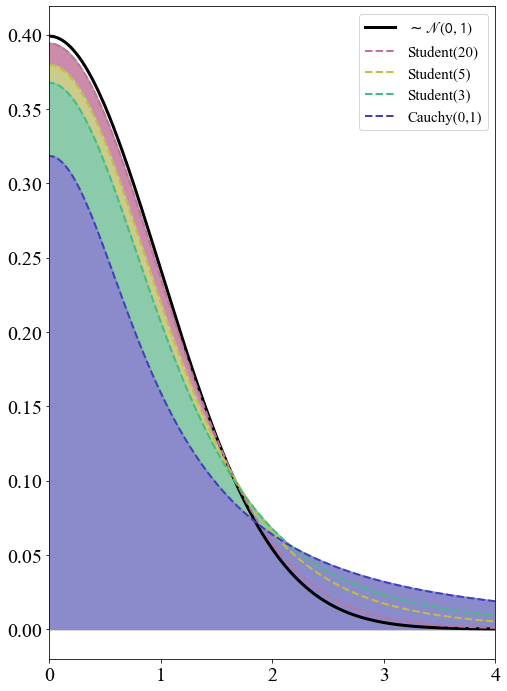

In [8]:
x = np.linspace(-4,4,1000)
n_1 = 3
n_2 = 5
n_3 = 20
t_1 = stats.t(n_1).pdf(x) # Student distribution k = 3
t_2 = stats.t(n_2).pdf(x) # Student distribution k = 5
t_3 = stats.t(n_3).pdf(x) # Student distribution k = 20
c = stats.cauchy(0,1).pdf(x) # Cauchy distribution 
norm_1 = stats.norm(0,1).pdf(x) # Normal distribution m=0, s=1

fig,ax =plt.subplots(figsize=(8, 12))
plt.tick_params(labelsize = 20)
plt.tick_params(labelsize = 20)

plt.xlim(0,4)

# Normal
plt.plot(x, norm_1, color='k',lw=3)
# Student k = 20
plt.plot(x, t_3, color='#C1749A', lw=2, linestyle = 'dashed')
plt.fill_between(x, y1 = t_3, y2 = 0, color='#cb8bab',lw=2,alpha = 1)
# Student k = 5
plt.plot(x, t_2, color='#bfbf40', lw=2, linestyle = 'dashed')
plt.fill_between(x, y1 = t_2, y2 = 0, color='#cbcb8b',lw=2,alpha = 1)
# Student k = 3
plt.plot(x, t_1 ,color='#40bf7f', lw=2, linestyle = 'dashed')
plt.fill_between(x, y1 = t_1, y2 = 0, color='#8bcbab',lw=2,alpha = 1)
# Cauchy
plt.plot(x, c, color='#4040bf', lw=2, linestyle = 'dashed')
plt.fill_between(x, y1 = c, y2 = 0, color='#8b8bcb',lw=2,alpha = 1)

plt.legend(['$\sim\mathscr{N(0,1)}$',
            f'Student({n_3})',
            f'Student({n_2})',
            f'Student({n_1})',
            'Cauchy(0,1)'],
           loc = 'upper right')
# plt.show() - Вывод рисунка: Рис. 9. График плотности распределения Стьюдента с k = (1, 3, 5, 20)

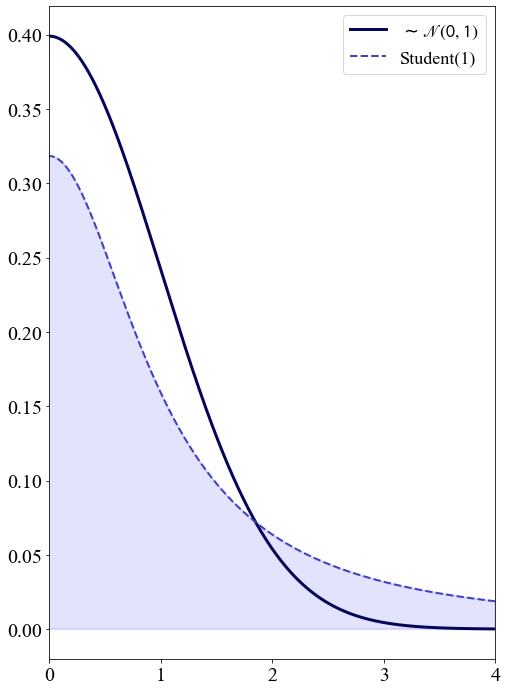

In [4]:
fig, ax = plt.subplots(figsize = (8, 12))
plt.tick_params(labelsize = 20)

# Создадим функцию анимации для нашего графика
def animate(i):
    ax.clear()

    
    x = np.linspace(-4,4,1000) # Зададим значения x
     # Строим график плотности нормального распределения 
    ax.plot(x, stats.norm(0,1).pdf(x), color = '#05055A', lw = 3)

    #Строим график плотности распределения Стьюдента в зависимости от степеней свободы 
    t = stats.t(i).pdf(x) # Student distribution n = i
    
    ax.plot(x, t, color='#4040bf', lw=2, linestyle = 'dashed')
    plt.fill_between(x, y1 = t, y2 = 0, color = (32/255, 32/255,243/255), lw=2, alpha = 0.1 + i*0.024)
#     (32 + i*8.44)
    
    #  Выводим график
    # ax.set_title(f'График плотности распределения t(n) при n = {i}', fontsize = 22) 
    ax.set_xlim([0,4])
    #ax.set_ylim(0, 0.45)
    ax.legend(['$\sim\mathscr{N(0,1)}$', f'Student({int(i)})'], loc = 'upper right', fontsize = 'large')    
    
    return ax

# Вызываем функцию
student_animation = animation.FuncAnimation(fig, animate, frames=np.linspace(1, 25, 25), repeat = False)

# Сохраняем интерактивный график в формате gif
f = r"C:\Users\micha\YandexDisk\УЧЕБНЫЕ МАТЕРИАЛЫ\II\МатСтат Курсовая\Моя Курсовая\Images\t_pdf.gif" 
writergif = animation.PillowWriter(fps=7) 
student_animation.save(f, writer=writergif)

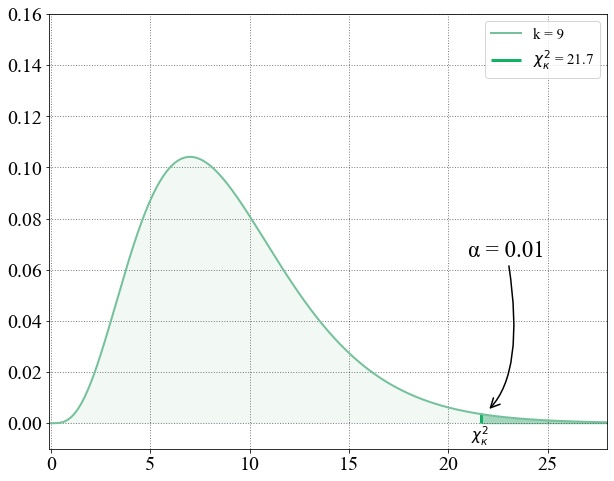

In [63]:
fig,ax =plt.subplots(figsize=(10, 8))
plt.tick_params(labelsize = 20)
plt.grid(color='k', alpha=0.5, linestyle=':', linewidth=1)

grid = np.linspace(0, 28, 1000)
line1, = ax.plot(grid, stats.chi2(df=9).pdf(grid), lw=2, color='#74c19b', label='k = 5')
ax.fill(grid, stats.chi2(df=9).pdf(grid), color='#d4ece0', alpha = 0.3)

plt.xlim(-0.1,28)
plt.ylim(-0.01,0.160)

chi2_rv1 = stats.chi2(df=9)
ddf = 9
# Уровень значимости
alpha = 0.01
p = chi2_rv1.isf(alpha)

ax.fill_between(grid[grid>p], chi2_rv1.pdf(grid[grid>p]), np.zeros(len(grid[grid>p])), color='#74c19b', alpha=0.8)

line2 = ax.vlines(p, 0, 0.004, color='#10b363', lw=3)

# Подписи на графике
ax.annotate(f'α = {alpha}', xy = (22, 0.005),
            xytext = (21, 0.065), 
            fontsize = 23, 
            arrowprops = dict(arrowstyle="->", lw = 1.5, connectionstyle="angle3,angleA=100,angleB=45"))

ax.annotate(f'$χ_к^2$', 
            xy = (p-0.5, -0.007))

# Легенда графика
plt.legend((line1, line2),[f"k = {ddf}", f'$χ_к^2$ = {p:.3}'], loc = 'upper right')
# plt.show() - Вывод рисунка: Рис. 6.1. Значения χ2 для k = 5 и α = 0,1, правостороняя гипотеза